In [3]:
# importing svih bitnih paketa za početak
# Ideja projekta je predvidjeti cijenu letova. S obzirom da je dataset limitiran samo na cijene za Indiju
# use case ovog projekta je Indija
# Prva ideja je bila napraviti recommender za put, ali to nije ML problem jer se može koristiti Djikstrinov algoritam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# prvi korak uvijek pogledati kako izgleda dataset
# na prvi pogled odmah se vidi nebitan stupac "Unnamed: 0 " koji će se poslje maknuti iz dataseta
df=pd.read_csv('Clean_Dataset.csv')
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [25]:
#ovaj code block je naknadno dodao, želio sam si vizualizirati sve posebne vrijednosti
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Unnamed: 0:
[     0      1      2 ... 300150 300151 300152]

Unique values for airline:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Unique values for flight:
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']

Unique values for source_city:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Unique values for departure_time:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Unique values for stops:
['zero' 'one' 'two_or_more']

Unique values for arrival_time:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Unique values for destination_city:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Unique values for class:
['Economy' 'Business']

Unique values for duration:
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
# popis svih stupaca koje moram poslje enkodirati
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
#spremanje sume svih zračnih kompanija za vizualizaciju dolje
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()


airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

/tmp/ipykernel_29091/1903367739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1['airline'],palette='hls')


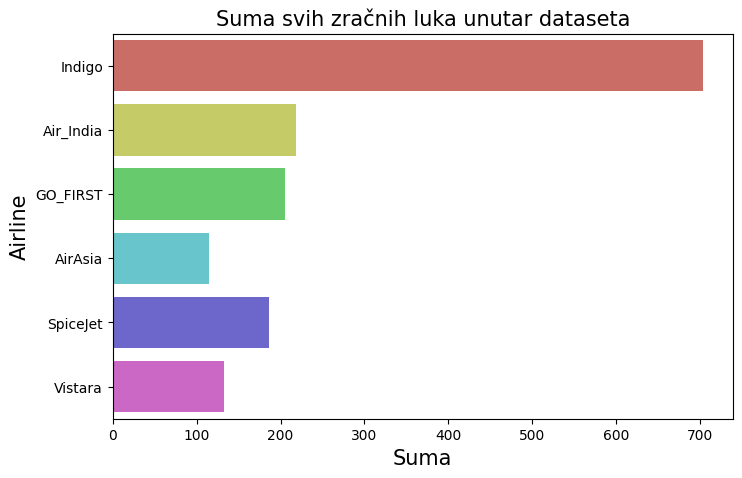

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Suma svih zračnih kompanija unutar dataseta',fontsize=15)
plt.ylabel('Airline',fontsize=15)
plt.xlabel('Suma',fontsize=15)
plt.show()

In [8]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

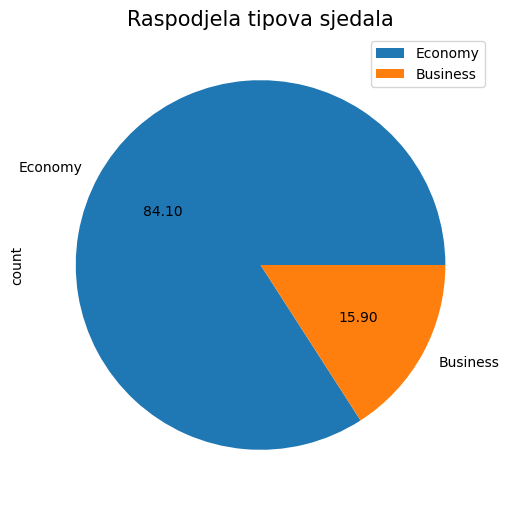

In [14]:
# Iz grafa se vidi da je znatno više Ekonomskih sjedala u datasetu
# To čini problem za model poslje jer su Business cijene drastično veće što utječe na feature importance
# Samo class stupac donosi ~90 feature importance

plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Raspodjela tipova sjedala',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

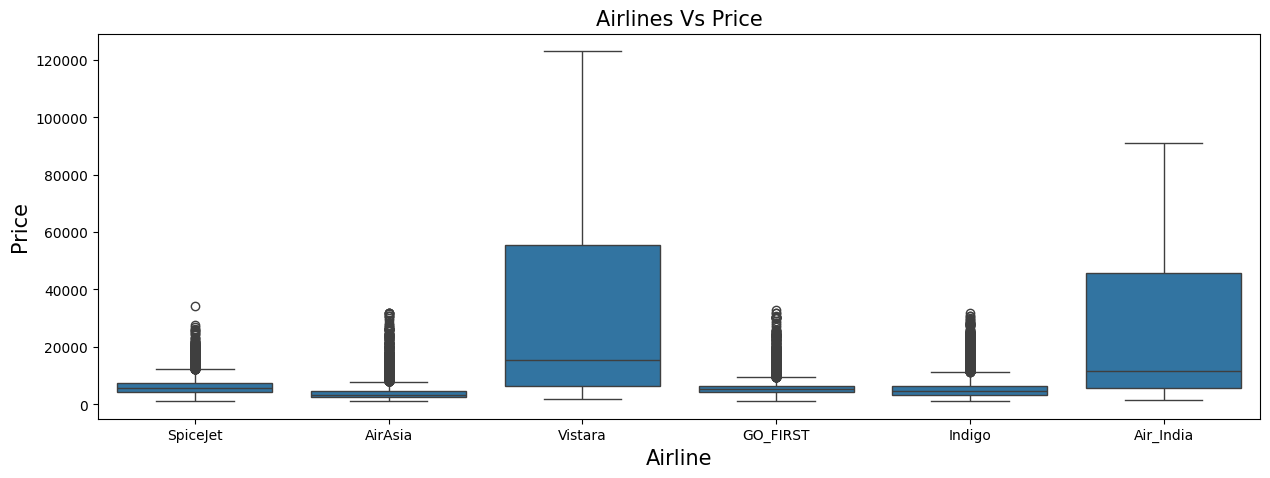

In [18]:
# želio sam vidjeti kolike su razlike u cijenama između zračnih kompanija

plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
# sve kompanije imaju otprilike iste cijene osim Vistara i Air_India, oni imaju
# najveću maksimalnu cijenu

/tmp/ipykernel_29091/2535144447.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=df,palette='hls')


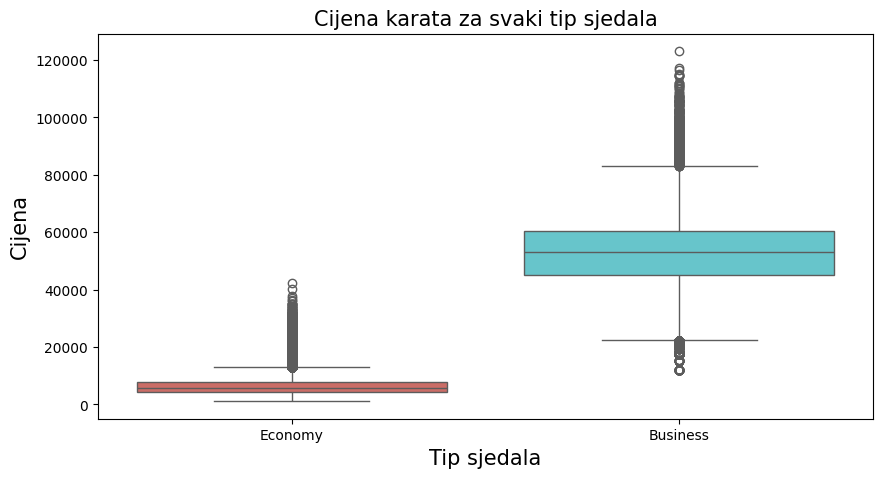

In [24]:
#ovdje se vizualizira razlika cijena Bussines i Economy class
#cijene su jako različite, a količina Bussines karata je znatno manja nego Economy class

plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Cijena karata za svaki tip sjedala',fontsize=15)
plt.xlabel('Tip sjedala',fontsize=15)
plt.ylabel('Cijena',fontsize=15)
plt.show()

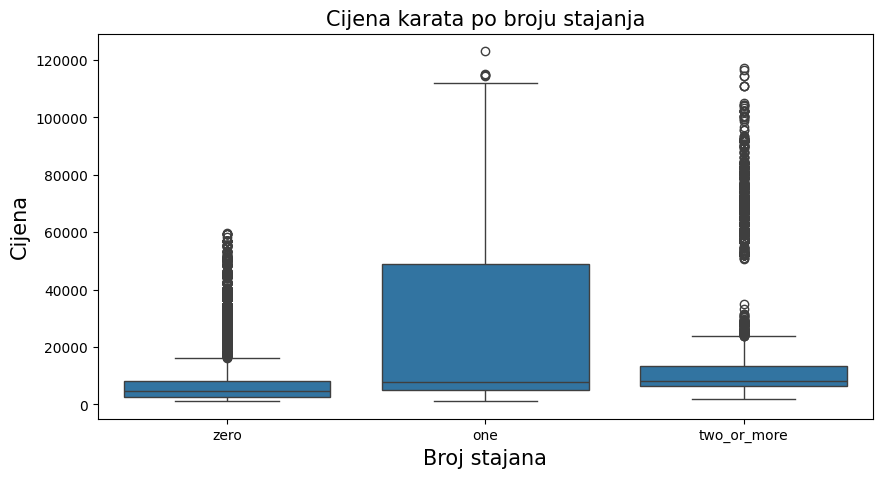

In [23]:
# stops stupac također ima jako veliku maksimalnu cijenu za jedno stajanje
# ovaj stupac isto ima relativno velik feature importance poslje prilikom
# izrade modela

plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df)
plt.title('Cijena karata po broju stajanja',fontsize=15)
plt.xlabel('Broj stajana',fontsize=15)
plt.ylabel('Cijena',fontsize=15)
plt.show()

/tmp/ipykernel_29091/2453050692.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city',y='price',data=df,palette='hls')


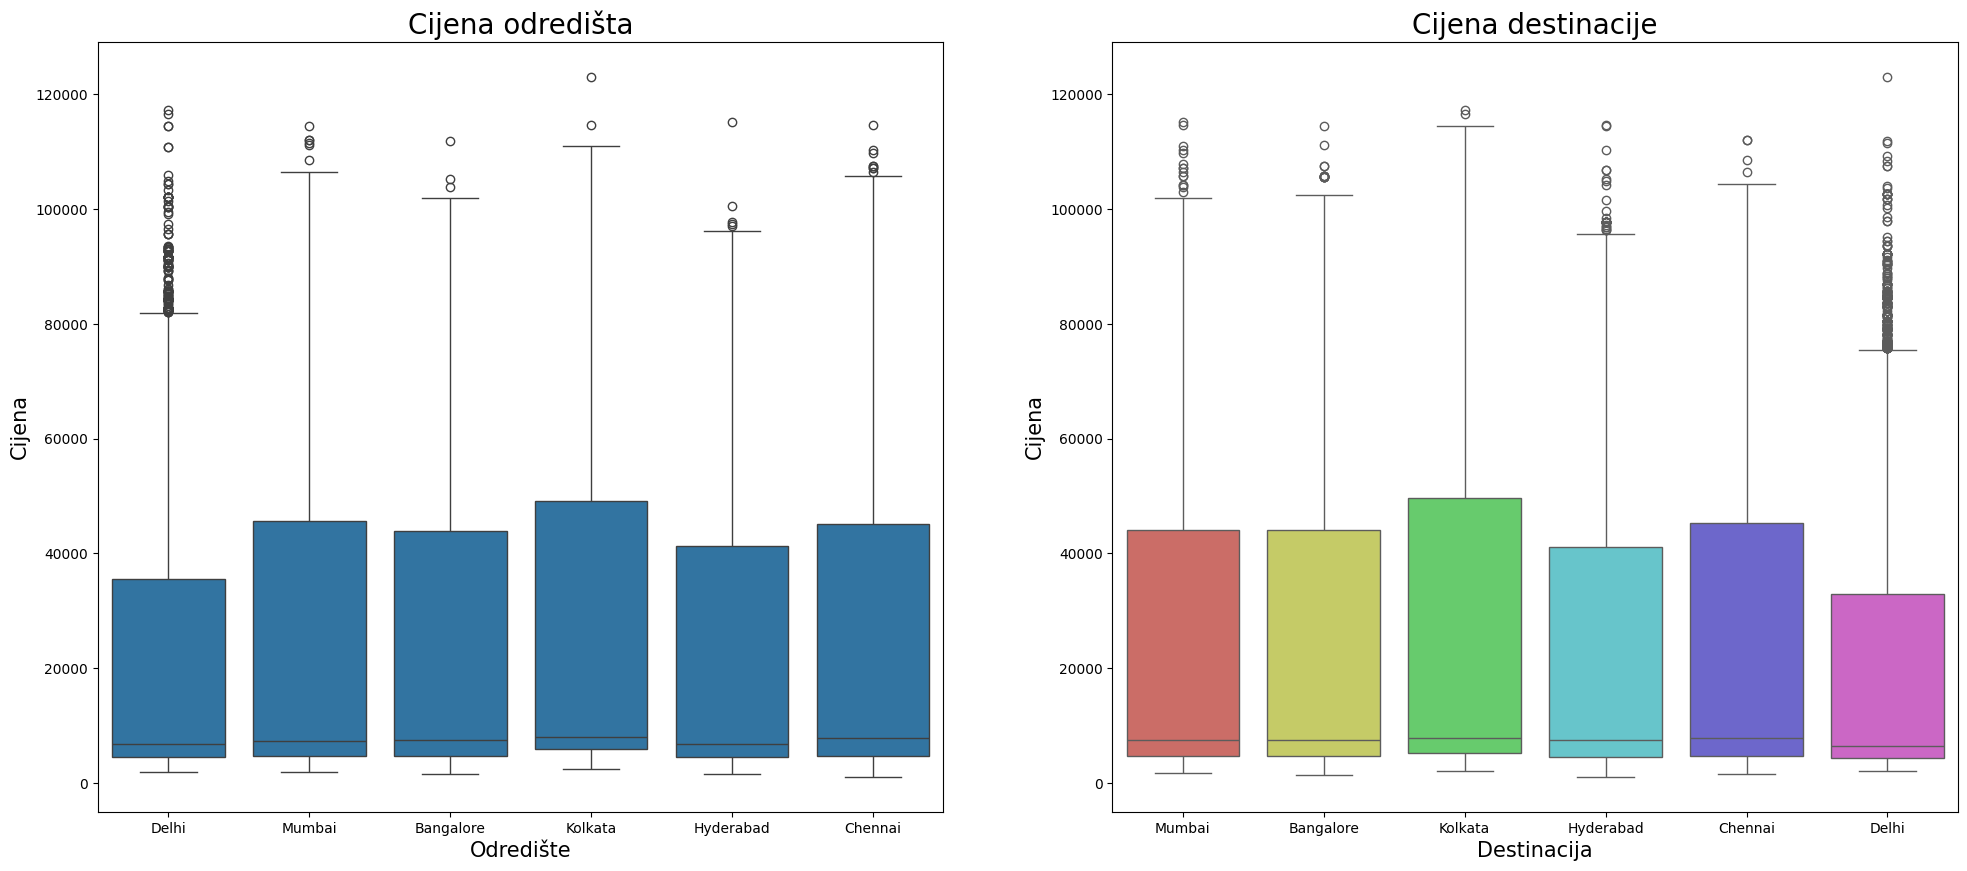

In [26]:
# ovdje se vidi da su cijene karata veče ako je početna i krajnja destinacija Kolkata
# Tijekom izrade modela imalo bi smisla da rute imaju velik utjecaj na predikciju
# iz nekog razloga ovi stupci imaju mali feature importance
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Cijena odredišta',fontsize=20)
plt.xlabel('Odredište',fontsize=15)
plt.ylabel('Cijena',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Cijena destinacije',fontsize=20)
plt.xlabel('Destinacija',fontsize=15)
plt.ylabel('Cijena',fontsize=15)
plt.show()

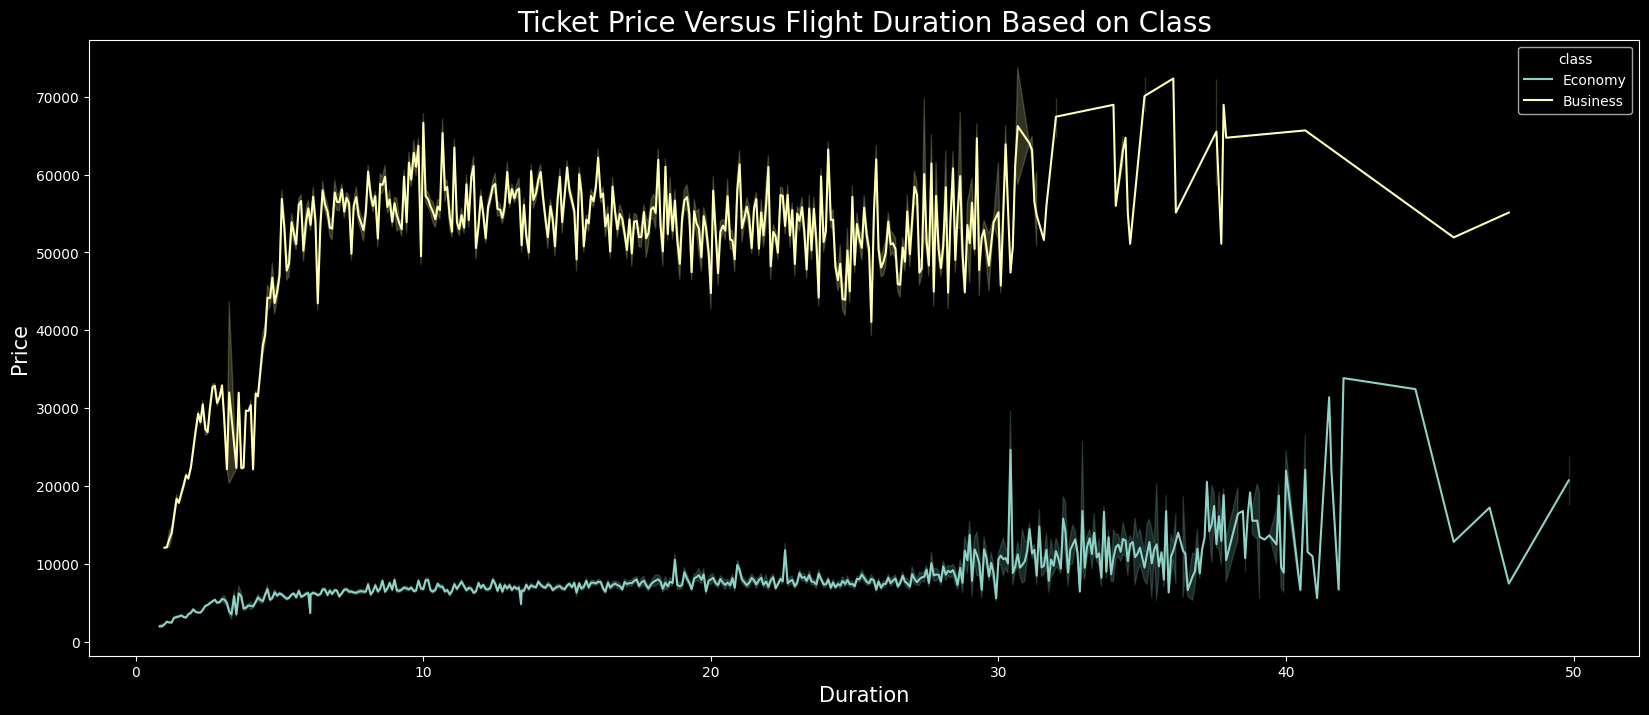

In [34]:
# Želio sam vidjeti kako se mijenja cijena s obzirom na trajanje leta za oba tipa sjedala

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

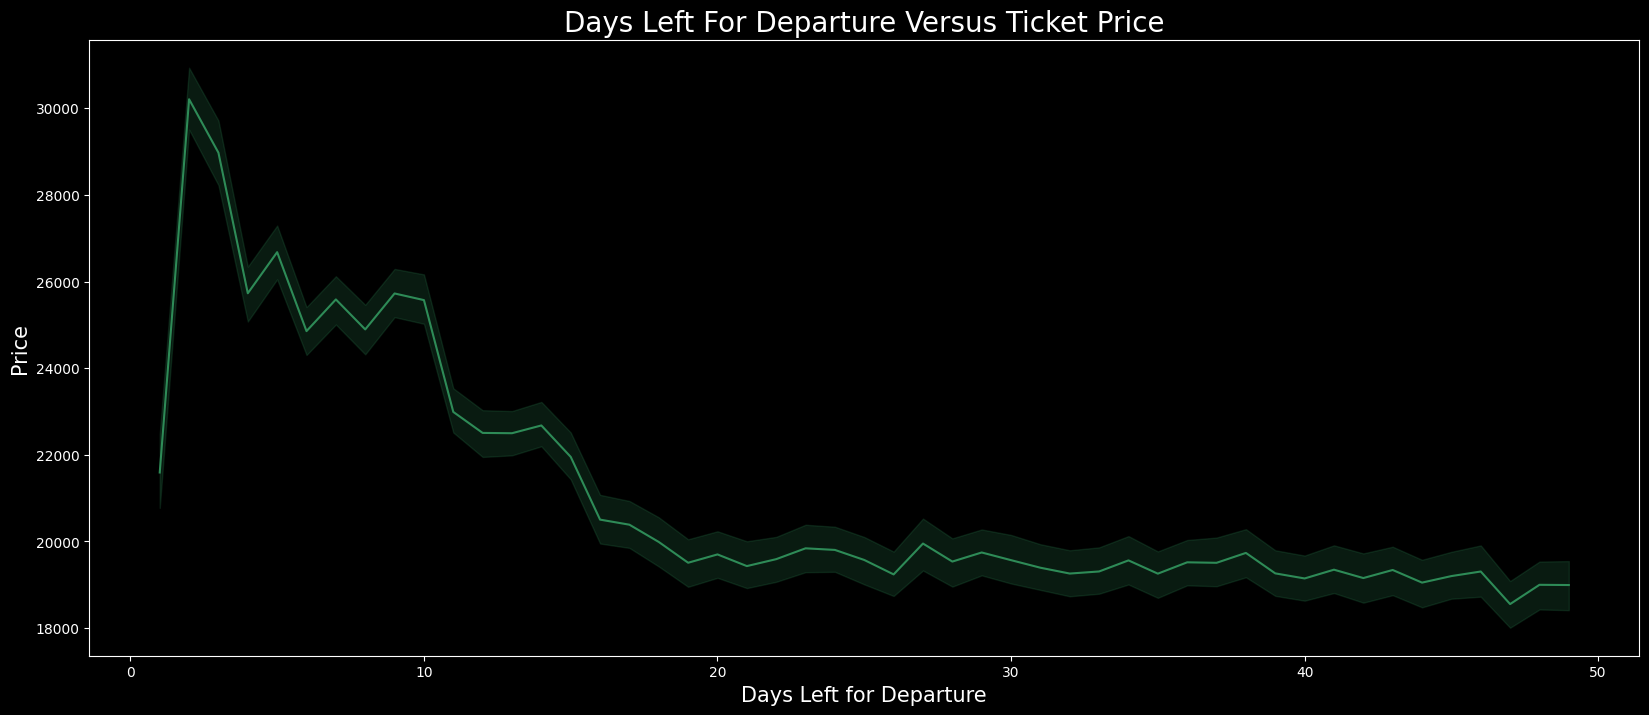

In [38]:
# Logično za očekivati da što se prije kupi karta, onda je ona jeftinija

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='seagreen')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [40]:
# količina letova za svaku kombinaciju leta

df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count()

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [42]:
# srednje cijene odredišta i destinacije zračnih kompanija
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017


In [43]:
#backup za svaki slucaj
df_bk=df.copy()

In [44]:
# prije kada se uzimao info veliki dio stupaca su bili tipa Object
# svaki od njih se ovdje enkodira
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [45]:

df = df.rename(columns={'class':'type'})
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,type,duration,days_left,price
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [46]:
# ovdje sam eksperimentirao
# probavao sam više kombinacija da vidim koliko mogu promijeniti feature importance modela


x=df.drop(columns=['price','duration','flight','days_left','Unnamed: 0'])
y=df['price']

In [47]:
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,type
0,4,2,2,2,5,5,1
1,4,2,1,2,4,5,1
2,0,2,1,2,1,5,1
3,5,2,4,2,0,5,1
4,5,2,4,2,4,5,1
...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0
300149,5,1,0,0,5,3,0
300150,5,1,1,0,5,3,0
300151,5,1,1,0,2,3,0


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 7), (90046, 7), (210107,), (90046,))

In [50]:
import sklearn
sklearn.__version__
# želio sam samo provjeriti verziju sklearn za docker ovisnost prilikom deployanja API-a

'1.3.2'

In [51]:
# Normalizacija vrijednosti za bolju stabilnost modela
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [64]:


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelETR = ExtraTreesRegressor()

# 
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelETR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('---------------------------------------------------------------------------------------')


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4952.633
Mean Squared Error (MSE): 52670531.492
Root Mean Squared Error (RMSE): 7257.447
R2_score: 0.897661
Root Mean Squared Log Error (RMSLE): 8.89
Mean Absolute Percentage Error (MAPE): 48.79 %
Adj R Square:  0.897659
---------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 2911.481
Mean Squared Error (MSE): 20968650.568
Root Mean Squared Error (RMSE): 4579.154
R2_score: 0.959258
Root Mean Squared Log Error (RMSLE): 8.429
Mean Absolute Percentage Error (MAPE): 27.41 %
Adj R Square:  0.959257
---------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 2912.936
Mean Squared Error (MSE): 20950324.656
Root Mean Squared Error (RMSE): 4577.152
R2_score: 0.959293
Root Mean Squared Log Error (RMSLE): 8.429
Mean Absolute Percentage Error (MAPE): 27.4

In [65]:
#Extra tree regressor ima najmanju grešku i dobru točnmost tako da će se
#na njemu fitati podatci
modelETR.fit(x_train, y_train)
    

y_pred = modelETR.predict(x_test)

In [66]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

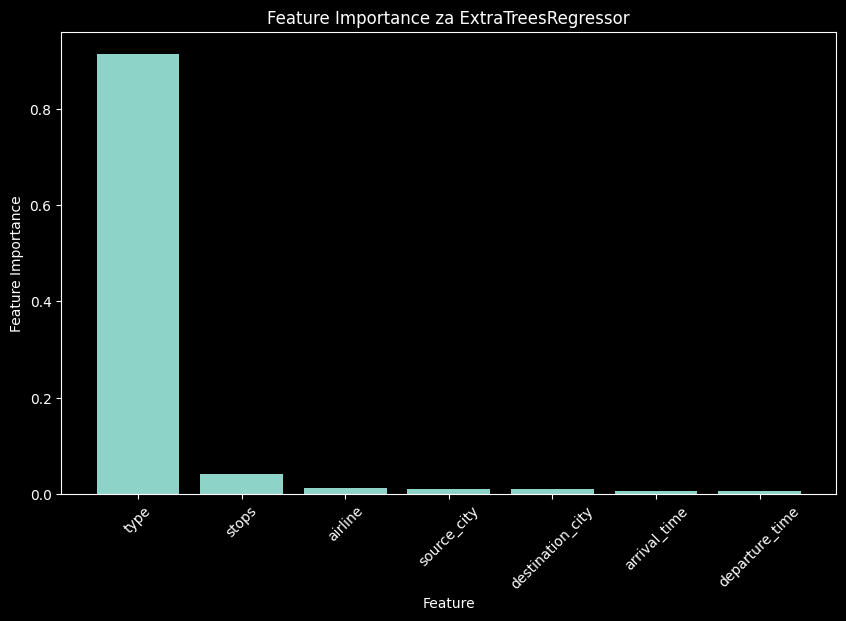

In [75]:

feature_names = ['airline','source_city', 'departure_time', 'stops','arrival_time','destination_city','type']

sorted_indices = modelETR.feature_importances_.argsort()[::-1]
#jasno se vidi da je tip sjedala najvažniji feature, u prethodnim vizualizacijama vidi se da
#ima utjecaj ostalih featura na model
#iz nekog razloga koliko god sam eksperimentirao sa treniranjem uvijek mi tip sjedala bude najvažniji feature

plt.figure(figsize=(10, 6))
plt.bar(range(len(modelETR.feature_importances_)), modelETR.feature_importances_[sorted_indices], align='center')
plt.xticks(range(len(modelETR.feature_importances_)), [feature_names[i] for i in sorted_indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance za ExtraTreesRegressor')
plt.show()

In [72]:
result.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
9954,9954,GO_FIRST,G8-113,Delhi,Early_Morning,one,Evening,Mumbai,Economy,12.42,49,6146,6146,7482.142857
127554,127554,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Economy,11.33,1,26282,26282,10687.094595
151030,151030,Air_India,AI-763,Kolkata,Early_Morning,one,Morning,Chennai,Economy,25.92,33,4969,4969,10744.578947
140436,140436,AirAsia,I5-541,Kolkata,Early_Morning,one,Morning,Bangalore,Economy,5.83,36,3862,3862,4145.434783
1129,1129,Indigo,6E-5001,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,8,5955,5955,3404.409091
260251,260251,Vistara,UK-846,Bangalore,Morning,one,Morning,Chennai,Business,27.33,30,44280,44280,45588.250000
127985,127985,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Economy,11.00,5,14154,14154,10687.094595
58462,58462,Indigo,6E-6051,Mumbai,Evening,one,Night,Bangalore,Economy,3.75,33,2124,2124,4222.494792
221662,221662,Air_India,AI-803,Delhi,Early_Morning,one,Afternoon,Hyderabad,Business,30.25,46,44405,44405,35697.600000
153421,153421,GO_FIRST,G8-7556,Hyderabad,Afternoon,zero,Evening,Delhi,Economy,2.17,11,6132,6132,2727.590909


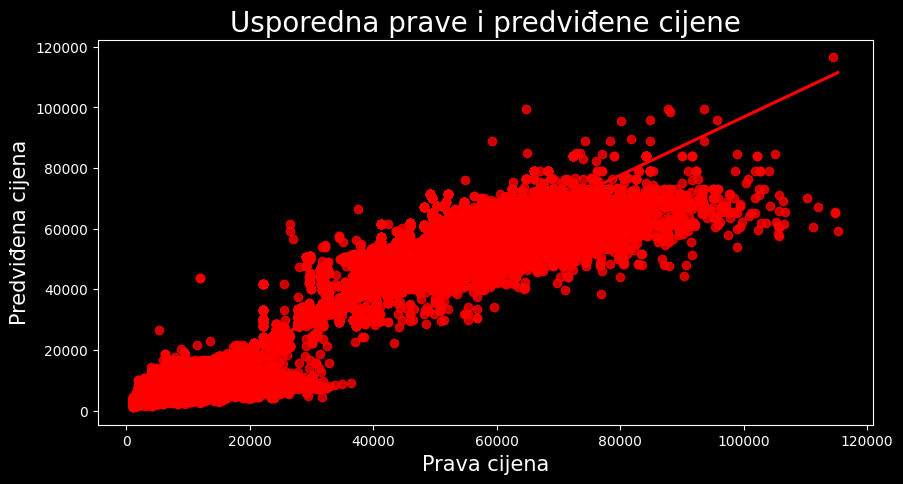

In [80]:
#model i dalje prikazuje relativno dobru točnost
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='red')
plt.title('Usporedba prave i predviđene cijene',fontsize=20)
plt.xlabel('Prava cijena',fontsize=15)
plt.ylabel('Predviđena cijena',fontsize=15)
plt.show()

In [79]:
import pickle
pickle.dump(modelETR, open('model.pkl', 'wb'))
